## Importing Data

In [1]:
# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Files to Load
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Reading the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combining the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')

# Previewing some of the data
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Preparing Data for Charting

In [2]:
#Making a summary dataframe grouped by city
city_grouped_df = combined_df.groupby(['city'])

#The final dataframe will have four columns: average fare per city, city type, total number of rides per city,
#and total number of drivers per city
average_fare = city_grouped_df['fare'].mean()

total_rides = city_grouped_df['ride_id'].nunique()

total_drivers = city_grouped_df['driver_count'].sum()

city_type = city_grouped_df['type'].unique().str[0]

#making the summary dataframe
summary_df = pd.DataFrame({
                "Average Fare": average_fare,
                "City Type": city_type,
                "Total number of rides": total_rides,
                "Total number of drivers": total_drivers
})

#previewing the summarized dataframe
summary_df

,Average Fare,City Type,Total number of rides,Total number of drivers
city,,,,
Amandaburgh,24.641667,Urban,18,216
Barajasview,25.332273,Urban,22,572
Barronchester,36.422500,Suburban,16,176
Bethanyland,32.956111,Suburban,18,396
Bradshawfurt,40.064000,Rural,10,70
Brandonfort,35.437368,Suburban,19,190
Carriemouth,28.314444,Urban,27,1404
Christopherfurt,24.501852,Urban,27,1107
Colemanland,30.894545,Suburban,22,506


In [3]:
# Making separate dataframes for each of the city types
rural_df = summary_df.loc[summary_df['City Type'] == 'Rural']
urban_df = summary_df.loc[summary_df['City Type'] == 'Urban']
suburban_df = summary_df.loc[summary_df['City Type'] == 'Suburban']

#previewing one of these city type dataframes
rural_df.head()

,Average Fare,City Type,Total number of rides,Total number of drivers
city,,,,
Bradshawfurt,40.064000,Rural,10,70
Garzaport,24.123333,Rural,3,21
Harringtonfort,33.470000,Rural,6,24
Jessicaport,36.013333,Rural,6,6
Lake Jamie,34.358333,Rural,6,24


## Bubble Plot

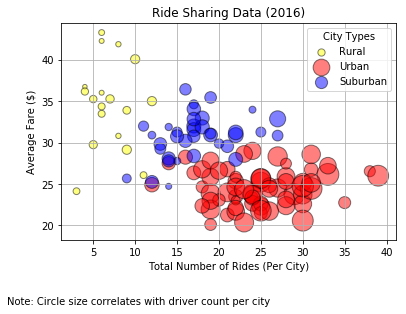

<Figure size 432x288 with 0 Axes>

In [4]:
# Building the scatter plots for each city type
plt.scatter(rural_df['Total number of rides'], rural_df['Average Fare'], s=(np.sqrt(rural_df['Total number of drivers'])*10), marker="o", facecolors='Yellow', alpha=0.5, edgecolors="black")
plt.scatter(urban_df['Total number of rides'], urban_df['Average Fare'], s=(np.sqrt(urban_df['Total number of drivers'])*10), marker="o", facecolors='Red', alpha=0.5, edgecolors="black")
plt.scatter(suburban_df['Total number of rides'], suburban_df['Average Fare'], s=(np.sqrt(suburban_df['Total number of drivers'])*10), marker="o", facecolors='Blue', alpha=0.5, edgecolors="black")

# Creating title, axis label, and legend
City_Types = ["Rural", "Urban", "Suburban"]
plt.title("Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.legend(City_Types, title="City Types")

# Incorporate a text label regarding circle size
plt.figtext(0, -0.1, s='Note: Circle size correlates with driver count per city')

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Rideshare_scatter_plot', dpi=150, bbox_inches = "tight")